In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

df_bio = pd.read_csv('BioParams.csv',delimiter='\t')


In [16]:
time = df_bio['time']

In [17]:
df_bio.head()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
0,4218.953655,149.687386,3.885644,0,1.118098,3.885644,1.118098,1.118098
1,4219.953655,150.119540,0.013899,0,0.001011,0.013899,0.001011,0.001011
2,4220.953655,150.541124,0.014908,0,0.000948,0.014908,0.000948,0.000948
3,4221.953655,150.951879,0.016010,0,0.000887,0.016010,0.000887,0.000887
4,4222.953655,151.351552,0.017218,0,0.000829,0.017218,0.000829,0.000829


In [18]:
df_bio.tail()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
1011,5229.953655,200.933099,0.005778,0,0.004368,0.005778,0.004368,0.004368
1012,5230.953655,200.666834,0.005462,0,0.004608,0.005462,0.004608,0.004608
1013,5231.953655,200.400827,0.005165,0,0.004860,0.005165,0.004860,0.004860
1014,5232.953655,200.135251,0.004884,0,0.005126,0.004884,0.005126,0.005126
1015,5233.953655,199.870277,0.004618,0,0.005407,0.004618,0.005407,NaN


<IPython.core.display.Javascript object>


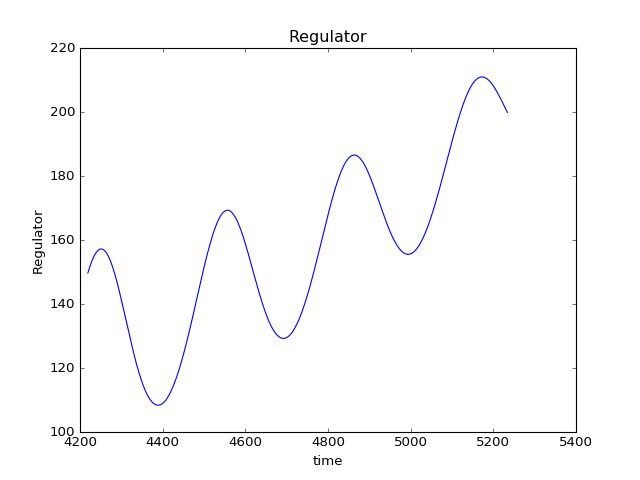

In [19]:
plt.figure(1)
plt.title('Regulator')
plt.plot(time,df_bio['Reg'])
plt.xlabel("time")
plt.ylabel("Regulator")
plt.show()

<IPython.core.display.Javascript object>


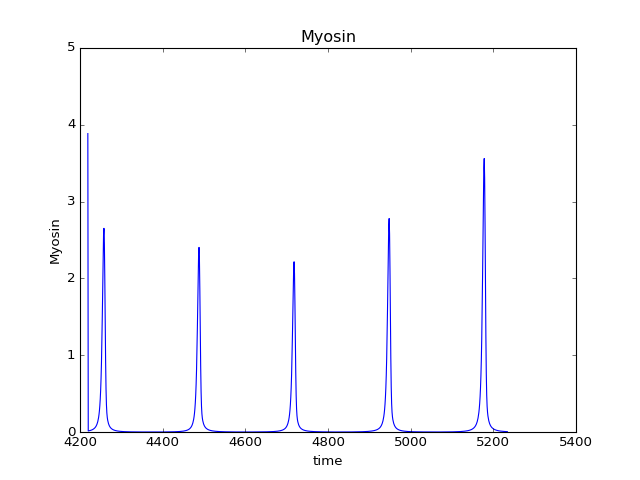

In [20]:
plt.figure(2)
plt.title('Myosin')
plt.plot(time,df_bio['myo0_1'])
plt.xlabel("time")
plt.ylabel("Myosin")
plt.ylim([0,5])
plt.show()

<IPython.core.display.Javascript object>


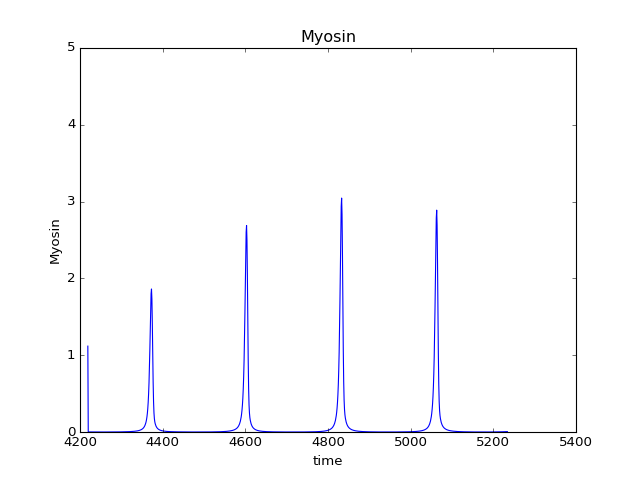

In [21]:
plt.figure(3)
plt.title('Myosin')
plt.plot(time,df_bio['myo1_7'])
plt.ylim([0,5])
plt.xlabel("time")
plt.ylabel("Myosin")
plt.show()

In [ ]:
df_bio.head()

In [ ]:
df_bio.tail()

In [ ]:
fig, ax1 = plt.subplots()
#plt.title('Area')
ax1.plot(time,df_location.area,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Area', color='b')
ax1.set_ylim(0.2,0.9)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.myo5, 'r-')
ax2.set_ylabel('Myosin', color='r')
#ax2.set_ylim(0,0.02)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [ ]:
df_bio.tail()

In [ ]:
fig, ax1 = plt.subplots()
plt.title('')
ax1.plot(time,df_bio.myo0,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Myosin', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.force0, 'r-')
ax2.set_ylabel('Force', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [ ]:
dt = np.diff(time)

In [ ]:
print("The max dt used was: ", np.amax(dt))
print("The min dt used was: ", np.amin(dt))
print("The mean dt used was:", np.mean(dt))
np.mean(dt)*10

In [ ]:
%matplotlib auto
p0 = (x0[0],y0[0])
p1 = (x1[0],y1[0])
p2 = (x2[0],y2[0])
p3 = (x3[0],y3[0])
p4 = (x4[0],y4[0])
p5 = (x5[0],y5[0])

nodes = [p0,p1,p2,p3,p4,p5]

G = nx.Graph()

i = 0
for node in nodes:
    G.add_node(i,{'pos':node,'cell':1})
#    G.add_edge('medial',i,{'name':1})
    i += 1
G.add_path([0,1,2,3,4,5,0])

fig = plt.figure()

pos = nx.get_node_attributes(G,'pos')

nx.draw(G,pos)
plt.title("Time")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

for i in range(1,len(time),1000):
    G.node[0]['pos'] = (x0[i],y0[i])
    G.node[1]['pos'] = (x1[i],y1[i])
    G.node[2]['pos'] = (x2[i],y2[i])
    G.node[3]['pos'] = (x3[i],y3[i])
    G.node[4]['pos'] = (x4[i],y4[i])
    G.node[5]['pos'] = (x5[i],y5[i])

    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)
    plt.title('Time')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.axis("on")
    plt.grid("on")
    plt.pause(0.5)

plt.show()